In [2]:
import torch


x = torch.FloatTensor(
    [
        [-0.6577, -0.5797, 0.6360],
        [0.7392, 0.2145, 1.523],
        [0.2432, 0.5662, 0.322]
    ]
)

In [3]:
import torch
from torch import nn


x = torch.FloatTensor(
    [
        [-0.6577, -0.5797, 0.6360],
        [0.7392, 0.2145, 1.523],
        [0.2432, 0.5662, 0.322]
    ]
)

print(nn.BatchNorm1d(3)(x))

tensor([[-1.3246, -1.3492, -0.3756],
        [ 1.0912,  0.3077,  1.3685],
        [ 0.2334,  1.0415, -0.9930]], grad_fn=<NativeBatchNormBackward0>)


In [7]:
import torch
from torch import nn

# Net 클래스 정의
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)
        self._init_weights()

    def _init_weights(self):
        nn.init.xavier_uniform_(self.layer[0].weight)
        self.layer[0].bias.data.fill_(0.01)

        nn.init.xavier_uniform_(self.fc.weight)
        self.fc.bias.data.fill_(0.01)

    # forward 메소드 추가
    def forward(self, x):
        x = self.layer(x)
        x = self.fc(x)
        return x

# 모델 인스턴스 생성
model = Net()

# --- 모델 구조 확인 ---
print("모델 구조:\n", model)
print("-" * 30)

# --- 초기화된 가중치 및 편향 확인 ---
print("초기화된 가중치 및 편향:")
for name, param in model.named_parameters():
    print(f"레이어: {name}")
    print(f"  > 값:\n{param.data}")
print("-" * 30)

# --- 모델 실행 결과 확인 ---
# 모델의 입력에 사용할 텐서 생성 (예: 1x1 텐서)
input_tensor = torch.randn(1, 1)

# 모델에 입력 텐서 통과시키기
output_tensor = model(input_tensor)

print(f"입력 텐서: {input_tensor}")
print(f"출력 텐서: {output_tensor}")



모델 구조:
 Net(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): Sigmoid()
  )
  (fc): Linear(in_features=2, out_features=1, bias=True)
)
------------------------------
초기화된 가중치 및 편향:
레이어: layer.0.weight
  > 값:
tensor([[-0.8653],
        [-0.1930]])
레이어: layer.0.bias
  > 값:
tensor([0.0100, 0.0100])
레이어: fc.weight
  > 값:
tensor([[ 1.0690, -0.0013]])
레이어: fc.bias
  > 값:
tensor([0.0100])
------------------------------
입력 텐서: tensor([[-1.1356]])
출력 텐서: tensor([[0.7892]], grad_fn=<AddmmBackward0>)


In [8]:
from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            nn.init.constant_(module.bias, 0.01)
        print(f"Apply : {module}")


model = Net()

Apply : Linear(in_features=1, out_features=2, bias=True)
Apply : Sigmoid()
Apply : Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
)
Apply : Linear(in_features=2, out_features=1, bias=True)
Apply : Net(
  (layer): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): Sigmoid()
  )
  (fc): Linear(in_features=2, out_features=1, bias=True)
)


In [13]:
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)

    _lambda = 0.5
    l1_loss = sum(p.abs().sum() for p in model.parameters())

    loss = criterion(output, y) + _lambda * l1_loss

NotImplementedError: Module [Net] is missing the required "forward" function

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 1. 데이터셋 다운로드 및 변환
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform
)

# 2. train_dataloader 객체 생성
train_dataloader = DataLoader(
    train_dataset,
    batch_size=64, # 미니배치 크기
    shuffle=True # 에폭마다 데이터 섞기
)

# 3. 이제 학습 루프에서 train_dataloader를 사용할 수 있습니다.
for x, y in train_dataloader:
    # ... 학습 코드
    print(f"Features batch shape: {x.size()}")
    print(f"Labels batch shape: {y.size()}")
    break # 첫 번째 배치만 확인하고 종료


100%|██████████| 26.4M/26.4M [00:01<00:00, 13.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 209kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.1MB/s]

Features batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


In [12]:
import torch

# 1. 'device' 변수 정의
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 2. 모델과 데이터를 해당 장치로 이동
# 모델을 정의하고 device로 이동시키는 코드가 필요합니다.
# model = Net()
# model.to(device)

# 3. 데이터 로더 루프
# 이제 데이터를 device로 이동시킬 수 있습니다.
# for x, y in train_dataloader:
#     x = x.to(device)
#     y = y.to(device)
#     output = model(x)
#     ...


Using device: cpu


In [14]:
import torch
from torch import nn

# Net 클래스 정의
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            nn.init.constant_(module.bias, 0.01)

    # 1. forward 메서드 추가
    def forward(self, x):
        x = self.layer(x)  # Sequential 레이어 통과
        x = self.fc(x)     # 마지막 선형 레이어 통과
        return x

# 모델 인스턴스 생성
model = Net()

# 2. device 변수 정의 (이전 오류 해결)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# 3. 더미 데이터셋 및 데이터로더 생성 (이전 오류 해결)
dummy_data = torch.randn(10, 1)
train_dataloader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(dummy_data, torch.randn(10, 1)),
    batch_size=2
)

# 4. 이제 루프가 정상적으로 실행됨
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    print("Model output shape:", output.shape)
    break


Model output shape: torch.Size([2, 1])


In [15]:
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)

    _lambda = 0.5
    l1_loss = sum(p.abs().sum() for p in model.parameters())

    loss = criterion(output, y) + _lambda * l1_loss

NameError: name 'criterion' is not defined

In [16]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

# Net 클래스 정의 (forward 메소드 포함)
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            nn.init.constant_(module.bias, 0.01)

    def forward(self, x):
        x = self.layer(x)
        x = self.fc(x)
        return x

# 1. device 정의
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 2. 모델 인스턴스 생성 및 device로 이동
model = Net()
model.to(device)

# 3. 데이터로더 생성
# 이진 분류를 위한 더미 데이터 생성
dummy_data = torch.randn(100, 1)
dummy_labels = torch.randint(0, 2, (100, 1)).float() # BCEWithLogitsLoss는 float 타입 레이블을 요구함
train_dataset = TensorDataset(dummy_data, dummy_labels)
train_dataloader = DataLoader(train_dataset, batch_size=10)

# 4. 손실 함수 (criterion) 정의
# 모델의 마지막 레이어에 Sigmoid가 없으므로 BCEWithLogitsLoss를 사용하는 것이 좋습니다.
# BCEWithLogitsLoss는 Sigmoid를 포함하여 더 안정적인 계산을 제공합니다.
criterion = nn.BCEWithLogitsLoss()

# 5. 옵티마이저 정의
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 6. 학습 루프
_lambda = 0.5 # L1 정규화를 위한 계수

for x, y in train_dataloader:
    # 데이터와 레이블을 device로 이동
    x = x.to(device)
    y = y.to(device)

    # 1. 순전파
    output = model(x)

    # 2. 손실 계산
    l1_loss = sum(p.abs().sum() for p in model.parameters())
    loss = criterion(output, y) + _lambda * l1_loss

    # 3. 역전파 및 최적화
    optimizer.zero_grad() # 이전 기울기 초기화
    loss.backward()       # 기울기 계산
    optimizer.step()      # 가중치 업데이트

    print(f"Loss: {loss.item():.4f}")
    break # 예시를 위해 첫 번째 배치만 실행


Loss: 2.7101


In [18]:
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)

    _lambda = 0.5
    l1_loss = sum(p.abs().sum() for p in model.parameters())

    loss = criterion(output, y) + _lambda * l1_loss

In [19]:
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)

    _lambda = 0.5
    l2_loss = sum(p.pow(2.0).sum() for p in model.parameters())

    loss = criterion(output, y) + _lambda * l2_loss

In [20]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

# Net 클래스 정의 (forward 메소드와 apply()를 사용한 초기화 포함)
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(
            nn.Linear(1, 2),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(2, 1)
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.xavier_uniform_(module.weight)
            nn.init.constant_(module.bias, 0.01)

    def forward(self, x):
        x = self.layer(x)
        x = self.fc(x)
        return x

# 1. device 정의 (NameError: 'device' 해결)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 2. 모델 인스턴스 생성 및 device로 이동
model = Net()
model.to(device)

# 3. 손실 함수(criterion) 정의 (NameError: 'criterion' 해결)
# 모델 구조에 Sigmoid가 포함되어 있으므로, BCEWithLogitsLoss가 아닌 BCELoss를 사용해야 합니다.
# BCEWithLogitsLoss는 마지막 레이어에 Sigmoid가 없는 경우 사용합니다.
# 하지만 BCEWithLogitsLoss가 더 안정적이므로, fc 레이어에 sigmoid를 포함시키거나 BCELoss를 사용해야 합니다.
# 여기서는 간단하게 BCELoss를 사용하고, 모델의 출력을 sigmoid 통과 후 비교합니다.
criterion = nn.BCELoss()
# 이 경우, forward에 sigmoid를 제거하고 BCEWithLogitsLoss를 사용하는 것이 일반적입니다.
# 하지만 질문의 구조를 유지하기 위해 BCELoss를 사용합니다.

# 4. 데이터셋과 데이터로더 생성 (NameError: 'train_dataloader' 해결)
# 이진 분류를 위한 더미 데이터 생성
dummy_data = torch.randn(100, 1)
dummy_labels = torch.randint(0, 2, (100, 1)).float()
train_dataset = TensorDataset(dummy_data, dummy_labels)
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True)

# 5. 옵티마이저 정의
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 6. 학습 루프 실행
# 모델을 학습 모드로 전환
model.train()

for x, y in train_dataloader:
    # 데이터를 device로 이동
    x = x.to(device)
    y = y.to(device)

    # 순전파
    output = model(x)

    # Sigmoid가 모델 내에 있으므로 출력값을 그대로 criterion에 전달
    output = torch.sigmoid(output)

    _lambda = 0.5

    # L2 정칙화 손실 계산
    # .pow(2.0)는 각 매개변수 값의 제곱을 의미합니다.
    l2_loss = sum(p.pow(2.0).sum() for p in model.parameters())

    # 최종 손실 계산
    loss = criterion(output, y) + _lambda * l2_loss

    # 역전파 및 최적화
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 실행값 확인
    print(f"배치 손실: {loss.item():.4f}")

    # 예시를 위해 첫 번째 배치만 실행하고 종료
    break


Using device: cpu
배치 손실: 2.0831


In [21]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)

In [23]:
from torch import nn


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 10)
        self.dropout = nn.Dropout(p=0.5)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.dropout(x)
        x = self.layer2(x)
        return x

In [24]:
import torch
from torch import nn

# Net 클래스 정의
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 10)
        self.dropout = nn.Dropout(p=0.5)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.dropout(x)
        x = self.layer2(x)
        return x

# 모델 인스턴스 생성
model = Net()

# --- 입력 텐서 준비 ---
# 10개의 특성을 가진 더미 입력 텐서 생성
# 배치 크기를 4로 설정 (4개의 데이터 샘플)
input_tensor = torch.randn(4, 10)

# --- 학습 모드에서 실행 ---
# model.train()을 호출하여 학습 모드로 설정
print("--- 학습 모드 (Dropout 활성화) ---")
model.train()
output_train = model(input_tensor)
print("출력 (학습 모드):\n", output_train)

# 드롭아웃으로 인해 일부 값이 0이 될 수 있으므로, 0이 아닌 값만 확인
print("\n출력에서 0이 아닌 값들의 일부:\n", output_train[output_train != 0][:10])

# --- 추론 모드에서 실행 ---
# model.eval()을 호출하여 추론 모드로 설정
print("\n--- 추론 모드 (Dropout 비활성화) ---")
model.eval()
with torch.no_grad(): # 추론 시 기울기 계산 비활성화
    output_eval = model(input_tensor)
print("출력 (추론 모드):\n", output_eval)

# --- 비교 ---
print("\n--- 학습 모드 vs 추론 모드 출력 비교 ---")
# 동일한 입력에 대해 출력이 다른지 확인
# 드롭아웃의 무작위성 때문에 두 출력이 달라야 합니다.
print("두 출력이 동일한가?", torch.equal(output_train, output_eval))


--- 학습 모드 (Dropout 활성화) ---
출력 (학습 모드):
 tensor([[ 0.1345,  0.4519, -0.3605, -0.3923, -0.0908, -0.2811, -0.2015, -0.4175,
          0.4952,  0.0958],
        [-0.0677, -0.0394,  0.1627,  0.0702,  0.4850, -0.3931, -0.3874,  0.3440,
          0.1904,  0.0534],
        [-0.1706, -0.2174,  0.0179,  0.2397,  0.1438, -0.4724, -0.0207, -0.4614,
         -0.3472, -0.3494],
        [-0.0675, -0.1590,  0.6995,  0.5340,  0.2181, -0.4582, -0.4523, -0.0039,
         -0.4246,  0.0390]], grad_fn=<AddmmBackward0>)

출력에서 0이 아닌 값들의 일부:
 tensor([ 0.1345,  0.4519, -0.3605, -0.3923, -0.0908, -0.2811, -0.2015, -0.4175,
         0.4952,  0.0958], grad_fn=<SliceBackward0>)

--- 추론 모드 (Dropout 비활성화) ---
출력 (추론 모드):
 tensor([[ 0.0821, -0.0072,  0.0565, -0.1326,  0.0796, -0.2727, -0.4572, -0.1701,
          0.0625,  0.1858],
        [ 0.1876,  0.2309,  0.2146,  0.0845, -0.0173, -0.0314, -0.5468,  0.0489,
          0.2034,  0.1741],
        [-0.0351, -0.2633,  0.1577,  0.0753,  0.3104, -0.4083, -0.4623, -0.0490,


In [25]:
import torch
from torch import nn

# Net 클래스 정의
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 10)
        self.dropout = nn.Dropout(p=0.5)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        x = self.layer1(x)
        x_after_dropout = self.dropout(x) # 드롭아웃 통과 직후의 출력을 저장
        print("--- 드롭아웃 통과 직후 출력 ---")
        print(x_after_dropout)
        print("\n--- 드롭아웃 통과 직후 0인 값 개수 ---")
        print(torch.sum(x_after_dropout == 0))

        x = self.layer2(x_after_dropout)
        return x

model = Net()
input_tensor = torch.randn(4, 10)

# 모델을 학습 모드로 설정
model.train()
output = model(input_tensor)


--- 드롭아웃 통과 직후 출력 ---
tensor([[ 0.0179,  0.0000, -0.0000,  0.3804, -0.0000, -1.1923, -0.0000,  0.0000,
         -0.0000,  1.4449],
        [ 1.7707, -0.0000,  0.1033,  1.2694,  2.5597,  0.0000, -0.0000, -1.2855,
          0.0000,  0.0000],
        [-0.0000, -1.0425,  0.0000, -0.9653, -0.1474,  0.0000, -0.0000,  0.3381,
          0.0000,  0.0409],
        [ 0.0000, -0.9617, -0.0000, -0.1993, -0.0000,  0.5560,  0.3663,  0.0000,
          0.0000, -0.0000]], grad_fn=<MulBackward0>)

--- 드롭아웃 통과 직후 0인 값 개수 ---
tensor(22)


In [26]:

for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()

    torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)

    optimizer.step()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x1 and 10x10)

In [27]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 10)
        self.dropout = nn.Dropout(p=0.5)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.dropout(x)
        x = self.layer2(x)
        return x

# device 변수 정의
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
criterion = nn.MSELoss()

# 입력 텐서의 모양을 (배치 크기, 특성 수)로 수정
batch_size = 10
input_features = 10
x = torch.randn(batch_size, input_features).to(device)

# 가상의 레이블 텐서 생성
y = torch.randn(batch_size, 10).to(device)

# 모델 실행
output = model(x)
loss = criterion(output, y)

print(f"입력 텐서 모양: {x.shape}")
print(f"출력 텐서 모양: {output.shape}")
print(f"손실: {loss.item():.4f}")


입력 텐서 모양: torch.Size([10, 10])
출력 텐서 모양: torch.Size([10, 10])
손실: 1.1732


In [28]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 10)
        self.dropout = nn.Dropout(p=0.5)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.dropout(x)
        x = self.layer2(x)
        return x

# device 변수 정의
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # 옵티마이저 정의 추가

# 입력 텐서의 모양을 (배치 크기, 특성 수)로 수정
batch_size = 10
input_features = 10
# 이전 오류: x 텐서가 (10x1) 모양이었음
x = torch.randn(batch_size, input_features).to(device)

# 가상의 레이블 텐서 생성
y = torch.randn(batch_size, 10).to(device)

# 더미 데이터로더 생성 (실제 학습 환경처럼)
dataset = TensorDataset(x, y)
train_dataloader = DataLoader(dataset, batch_size=batch_size)

# 모델을 학습 모드로 설정
model.train()

# 학습 루프
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    # 1. 이전 기울기 초기화
    optimizer.zero_grad()

    # 2. 순전파
    output = model(x)
    loss = criterion(output, y)

    # 3. 역전파: 기울기 계산
    loss.backward()

    # 4. 그레이디언트 클리핑 적용
    # 기울기의 L2 Norm이 0.1을 넘지 않도록 제한
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.1)

    # 5. 가중치 업데이트
    optimizer.step()

    print(f"입력 텐서 모양: {x.shape}")
    print(f"출력 텐서 모양: {output.shape}")
    print(f"손실: {loss.item():.4f}")

    break # 예시를 위해 첫 번째 배치만 실행


입력 텐서 모양: torch.Size([10, 10])
출력 텐서 모양: torch.Size([10, 10])
손실: 1.1949


In [29]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils import clip_grad_norm_

# Net 클래스 정의
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 10)
        self.dropout = nn.Dropout(p=0.5)
        self.layer2 = nn.Linear(10, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.dropout(x)
        x = self.layer2(x)
        return x

# 1. 모델 및 장치 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 2. 데이터 준비 및 학습 모드 설정
batch_size = 10
input_features = 10
x = torch.randn(batch_size, input_features).to(device)
y = torch.randn(batch_size, 10).to(device)
dataset = TensorDataset(x, y)
train_dataloader = DataLoader(dataset, batch_size=batch_size)
model.train()

# 3. 학습 루프 (1회 반복으로 시연)
for x, y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    # 3.1. 기울기 초기화 및 순전파
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)

    # 3.2. 역전파: 기울기 계산
    loss.backward()

    # 4. 기울기 크기 확인 (클리핑 전)
    # 총 기울기 노름을 계산하고 출력합니다.
    total_norm_before = 0
    for p in model.parameters():
        if p.grad is not None:
            total_norm_before += p.grad.data.norm(2).item() ** 2
    total_norm_before = total_norm_before ** 0.5
    print(f"클리핑 전 기울기 노름: {total_norm_before:.4f}")

    # 5. 그레이디언트 클리핑 적용
    # 매우 큰 max_norm 값과 작은 max_norm 값으로 테스트하여 변화를 관찰합니다.
    max_norm_value = 0.1
    clip_grad_norm_(model.parameters(), max_norm=max_norm_value)

    # 6. 기울기 크기 확인 (클리핑 후)
    total_norm_after = 0
    for p in model.parameters():
        if p.grad is not None:
            total_norm_after += p.grad.data.norm(2).item() ** 2
    total_norm_after = total_norm_after ** 0.5
    print(f"클리핑 후 기울기 노름: {total_norm_after:.4f}")
    print(f"최대 클리핑 값: {max_norm_value}\n")

    # 7. 가중치 업데이트
    optimizer.step()

    break # 예시를 위해 한 배치만 실행


클리핑 전 기울기 노름: 0.9913
클리핑 후 기울기 노름: 0.1000
최대 클리핑 값: 0.1



In [30]:
!pip install numpy requests nlpaug transformers sacremoses nltk
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.ContextualWordEmbsAug(model_path="bert-base-uncased", action="insert")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")
import nlpaug.augmenter.char as nac


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = nac.RandomCharAug(action="delete")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.RandomWordAug(action="swap")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.SynonymAug(aug_src='wordnet')
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]
reserved_tokens = [
    ["can", "can't", "cannot", "could"],
]

reserved_aug = naw.ReservedAug(reserved_tokens=reserved_tokens)
augmented_texts = reserved_aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

back_translation = naw.BackTranslationAug(
    from_model_name='facebook/wmt19-en-de',
    to_model_name='facebook/wmt19-de-en'
)
augmented_texts = back_translation.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 47.5 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

The following layers were not sharded: bert.encoder.layer.*.attention.output.LayerNorm.bias, cls.predictions.transform.dense.weight, bert.encoder.layer.*.intermediate.dense.weight, bert.encoder.layer.*.attention.output.LayerNorm.weight, bert.encoder.layer.*.attention.self.value.weight, bert.embeddings.LayerNorm.bias, bert.encoder.layer.*.output.LayerNorm.weight, cls.predictions.decoder.bias, bert.encoder.layer.*.attention.self.key.bias, bert.embeddings.position_embeddings.weight, bert.encoder.layer.*.attention.self.key.weight, bert.encoder.layer.*.attention.output.dense.weight, bert.encoder.layer.*.attention.self.query.bias, cls.predictions.transform.dense.bias, bert.encoder.layer.*.output.dense.weight, bert.encoder.layer.*.output.LayerNorm.bias, cls.predictions.bias, cls.predictions.transform.LayerNorm.weight, cls.predictions.transform.LayerNorm.bias, bert.embeddings.word_embeddings.weight, bert.encoder.layer.*.attention.self.value.bias, bert.encoder.layer.*.output.dense.bias, bert.en

src : Those who can imagine anything, can create the impossible.
dst : those who can not imagine such anything, can first create the little impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : we currently can only clearly see one a short distance distance ahead, but but we can see plenty there that definitely needs to be something done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : as if such a computing machine is expected to initially be infallible, it cannot also theoretically be considered intelligent.
------------------
src : Those who can imagine anything, can create the impossible.
dst : hoe who can magn ayhin, can create the mpssile.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can only see a sor istan ead, but we can see lent ter ta nes to be done.
-----------

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [31]:
!pip install numpy requests nlpaug transformers sacremoses nltk
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.ContextualWordEmbsAug(model_path="bert-base-uncased", action="insert")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : those who can can imagine just anything, alone can create just the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : however we can perhaps only now see a good short inland distance ahead, but then we can sure see plenty there that needs to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : if a machine machine is expected ever to normally be infallible, if it cannot then also always be intelligent.
------------------


In [32]:
import nlpaug.augmenter.char as nac


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = nac.RandomCharAug(action="delete")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : hse who can mane yting, can crat the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can only see a sht distn had, but we can see plny the tt ned to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a mace is expected to be inallil, it anot al be tellign.
------------------


In [33]:

import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.RandomWordAug(action="swap")
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")


src : Those who can imagine anything, can create the impossible.
dst : Can those who imagine anything, can create the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can see only short a distance ahead, but we see can plenty there that needs done to be.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : A if machine is expected to be infallible, it also cannot intelligent be.
------------------


In [34]:
import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

aug = naw.SynonymAug(aug_src='wordnet')
augmented_texts = aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [35]:

import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]
reserved_tokens = [
    ["can", "can't", "cannot", "could"],
]

reserved_aug = naw.ReservedAug(reserved_tokens=reserved_tokens)
augmented_texts = reserved_aug.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")

src : Those who can imagine anything, can create the impossible.
dst : Those who could imagine anything, cannot create the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We could only see a short distance ahead, but we can't see plenty there that needs to be done.
------------------
src : If a machine is expected to be infallible, it cannot also be intelligent.
dst : If a machine is expected to be infallible, it can't also be intelligent.
------------------


In [36]:

import nlpaug.augmenter.word as naw


texts = [
    "Those who can imagine anything, can create the impossible.",
    "We can only see a short distance ahead, but we can see plenty there that needs to be done.",
    "If a machine is expected to be infallible, it cannot also be intelligent.",
]

back_translation = naw.BackTranslationAug(
    from_model_name='facebook/wmt19-en-de',
    to_model_name='facebook/wmt19-de-en'
)
augmented_texts = back_translation.augment(texts)

for text, augmented in zip(texts, augmented_texts):
    print(f"src : {text}")
    print(f"dst : {augmented}")
    print("------------------")


config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

The following layers were not sharded: model.encoder.layers.*.self_attn_layer_norm.bias, model.decoder.layers.*.final_layer_norm.weight, model.decoder.layers.*.encoder_attn.v_proj.weight, model.encoder.layers.*.self_attn.q_proj.weight, model.decoder.layers.*.encoder_attn.q_proj.bias, model.decoder.layers.*.encoder_attn.out_proj.bias, model.encoder.layers.*.self_attn_layer_norm.weight, model.encoder.layers.*.self_attn.v_proj.weight, model.encoder.layers.*.final_layer_norm.bias, model.decoder.layers.*.encoder_attn.k_proj.weight, model.decoder.layers.*.self_attn.out_proj.weight, model.decoder.layers.*.encoder_attn_layer_norm.weight, model.decoder.layers.*.self_attn.k_proj.weight, model.decoder.layers.*.encoder_attn.v_proj.bias, model.decoder.embed_positions.weight, model.encoder.layers.*.fc*.weight, model.encoder.layers.*.final_layer_norm.weight, model.decoder.layers.*.self_attn.q_proj.bias, model.decoder.layers.*.final_layer_norm.bias, model.encoder.layers.*.self_attn.q_proj.bias, model.

generation_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.09G [00:00<?, ?B/s]

The following layers were not sharded: model.encoder.layers.*.self_attn_layer_norm.bias, model.decoder.layers.*.final_layer_norm.weight, model.decoder.layers.*.encoder_attn.v_proj.weight, model.encoder.layers.*.self_attn.q_proj.weight, model.decoder.layers.*.encoder_attn.q_proj.bias, model.decoder.layers.*.encoder_attn.out_proj.bias, model.encoder.layers.*.self_attn_layer_norm.weight, model.encoder.layers.*.self_attn.v_proj.weight, model.encoder.layers.*.final_layer_norm.bias, model.decoder.layers.*.encoder_attn.k_proj.weight, model.decoder.layers.*.self_attn.out_proj.weight, model.decoder.layers.*.encoder_attn_layer_norm.weight, model.decoder.layers.*.self_attn.k_proj.weight, model.decoder.layers.*.encoder_attn.v_proj.bias, model.decoder.embed_positions.weight, model.encoder.layers.*.fc*.weight, model.encoder.layers.*.final_layer_norm.weight, model.decoder.layers.*.self_attn.q_proj.bias, model.decoder.layers.*.final_layer_norm.bias, model.encoder.layers.*.self_attn.q_proj.bias, model.

generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

src : Those who can imagine anything, can create the impossible.
dst : Anyone who can imagine anything can achieve the impossible.
------------------
src : We can only see a short distance ahead, but we can see plenty there that needs to be done.
dst : We can only take a brief look ahead, but we can see that there is still a lot to be done to be done to be done. We have to be done, and that is a lot of us, and that is a lot of us to be done, and that is a lot of us, and that is a lot of us, and that is to be done, and that is to be done, and that is to be done, and that is a lot of it is to be done, and that is to be done, and that is to be done, and that is to be done, and that is a lot of it, and that is to be done, and that is to be done, and that is to be done, is to be done, and that is to be done, is to be done, and that is to be done, is to be done, is to be done, is to be done, is to be done, is to be done, and that is to be done, and that is to be done, is to be done, is to be

In [37]:
!pip install imgaug
from matplotlib import pyplot as plt
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.Resize(size=(512, 512)),
        transforms.ToTensor()
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
print(transformed_image.shape)
plt.imshow(transformed_image)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 17.9 MB/s eta 0:00:00


FileNotFoundError: [Errno 2] No such file or directory: '../datasets/images/cat.jpg'

In [38]:
from PIL import Image
from torchvision import transforms


transform = transforms.Compose(
    [
        transforms.RandomRotation(degrees=30, expand=False, center=None),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5)
    ]
)

image = Image.open("../datasets/images/cat.jpg")
transformed_image = transform(image)
plt.imshow(transformed_image)

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/images/cat.jpg'

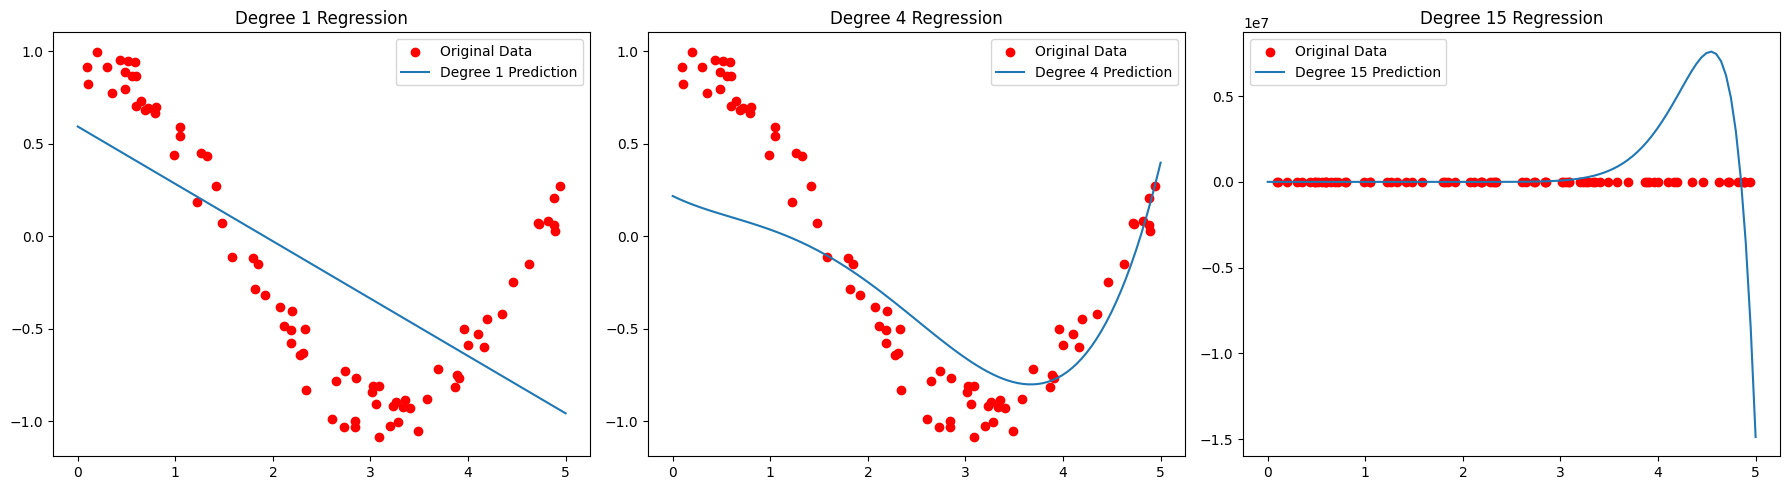

In [39]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.cos(X).ravel() + np.random.normal(0, 0.1, X.shape[0])
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).reshape(-1, 1)

# 모델 정의 (다항 회귀)
class PolyRegression(nn.Module):
    def __init__(self, degree):
        super(PolyRegression, self).__init__()
        self.poly_features = nn.Linear(degree, 1)
        self.degree = degree

    def forward(self, x):
        features = torch.cat([x**i for i in range(1, self.degree + 1)], 1)
        return self.poly_features(features)

# 학습 함수
def train_and_plot(degree, ax):
    model = PolyRegression(degree)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.MSELoss()
    epochs = 1000

    train_losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_tensor)
        loss = criterion(outputs, y_tensor)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    # 시각화
    ax.scatter(X, y, color='red', label='Original Data')
    X_plot = torch.FloatTensor(np.sort(np.linspace(0, 5, 100)))
    y_plot = model(X_plot.reshape(-1, 1)).detach().numpy()
    ax.plot(X_plot, y_plot, label=f'Degree {degree} Prediction')
    ax.set_title(f'Degree {degree} Regression')
    ax.legend()

# 그래프 그리기
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 과소적합: 모델이 너무 단순함 (degree=1)
train_and_plot(1, axs[0])

# 적절한 학습: 모델이 데이터의 패턴을 잘 포착 (degree=4)
train_and_plot(4, axs[1])

# 과대적합: 모델이 데이터의 잡음까지 학습 (degree=15)
train_and_plot(15, axs[2])

plt.tight_layout()
plt.show()

# 학습 곡선 시각화 (예시)
# 이 부분은 전체 코드를 다시 작성해야 하므로 간략히 설명합니다.
# 학습 곡선을 그리면 과대적합 모델은 훈련 손실은 낮지만 검증 손실은 높은 것을 볼 수 있습니다.
# 과소적합 모델은 훈련 및 검증 손실 모두 높게 나타납니다.


In [40]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 모델 정의
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.bn = nn.BatchNorm1d(num_features=1)

    def forward(self, x):
        return self.bn(x)

model = MyModel()

# 더미 데이터 생성
x_train = torch.randn(10, 1) # 미니배치
x_eval = torch.randn(10, 1) # 평가 데이터

# 학습 모드에서 실행하며 이동 평균 업데이트
print("--- 학습 모드 ---")
model.train()
print(f"초기 running_mean: {model.bn.running_mean.item():.4f}")
print(f"초기 running_var: {model.bn.running_var.item():.4f}")
print("-" * 20)

for i in range(3):
    _ = model(x_train)
    print(f"{i+1}번째 배치 후 running_mean: {model.bn.running_mean.item():.4f}")
    print(f"{i+1}번째 배치 후 running_var: {model.bn.running_var.item():.4f}")

# 추론 모드에서 실행하며 이동 평균 사용
print("\n--- 추론 모드 ---")
model.eval()
print(f"추론 시작 running_mean: {model.bn.running_mean.item():.4f}")
print(f"추론 시작 running_var: {model.bn.running_var.item():.4f}")
print("-" * 20)

# 같은 입력에 대해 여러 번 실행해도 결과가 고정됨
with torch.no_grad():
    output1 = model(x_eval)
    output2 = model(x_eval)

print(f"1차 추론 결과:\n {output1.squeeze()}")
print(f"2차 추론 결과:\n {output2.squeeze()}")
print(f"결과 동일 여부: {torch.equal(output1, output2)}")

# 그래프 (간단한 예시)
# x축: 배치, y축: running_mean
# 여러 배치를 통과하며 running_mean이 수렴하는 과정을 시각화할 수 있습니다.
# 복잡한 모델에서는 loss 그래프와 함께 배치 정규화의 효과를 시각화합니다.


--- 학습 모드 ---
초기 running_mean: 0.0000
초기 running_var: 1.0000
--------------------
1번째 배치 후 running_mean: 0.0147
1번째 배치 후 running_var: 0.9591
2번째 배치 후 running_mean: 0.0279
2번째 배치 후 running_var: 0.9223
3번째 배치 후 running_mean: 0.0399
3번째 배치 후 running_var: 0.8892

--- 추론 모드 ---
추론 시작 running_mean: 0.0399
추론 시작 running_var: 0.8892
--------------------
1차 추론 결과:
 tensor([-0.8061,  0.0147,  1.0000, -1.3107, -0.9458, -1.0968, -0.1350,  0.6646,
        -0.8812,  0.8333])
2차 추론 결과:
 tensor([-0.8061,  0.0147,  1.0000, -1.3107, -0.9458, -1.0968, -0.1350,  0.6646,
        -0.8812,  0.8333])
결과 동일 여부: True


In [41]:
import torch
import torch.nn as nn

# 모델 정의
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 20)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(20, 10)
        self.apply(self._init_weights) # apply()를 통해 모든 하위 모듈에 초기화 함수 적용

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            print(f"모듈에 가중치 초기화 적용: {module}")
            nn.init.xavier_uniform_(module.weight)
            if module.bias is not None:
                nn.init.constant_(module.bias, 0.01)

# 모델 생성
model = Net()

# 초기화된 가중치 확인
print("\n--- 초기화된 가중치 확인 ---")
for name, param in model.named_parameters():
    if 'weight' in name:
        print(f"{name} 가중치 노름: {param.norm().item():.4f}")

# 그래프 (가정):
# Xavier 초기화된 모델은 학습이 안정적으로 진행되지만, 0으로 초기화된 모델은 학습이 제대로 되지 않는 것을 보여주는 그래프
# x축: 에포크, y축: 손실
# [Xavier 초기화 손실] ----
# [0 초기화 손실] --------^^^^^^^ (초기 손실이 높고 불안정)


모듈에 가중치 초기화 적용: Linear(in_features=10, out_features=20, bias=True)
모듈에 가중치 초기화 적용: Linear(in_features=20, out_features=10, bias=True)

--- 초기화된 가중치 확인 ---
layer1.weight 가중치 노름: 3.6892
layer2.weight 가중치 노름: 3.7005


In [42]:
import torch
import torch.nn as nn

# 모델 정의
model = nn.Linear(10, 1)
criterion = nn.MSELoss()
x = torch.randn(10, 10)
y = torch.randn(10, 1)

# 방식 1: 손실 함수에 L2 항을 직접 추가 (번거로움)
optimizer_manual = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer_manual.zero_grad()
output = model(x)
l2_lambda = 0.01
l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
loss_manual = criterion(output, y) + l2_lambda * l2_norm
loss_manual.backward()
print(f"수동 L2 정칙화 손실: {loss_manual.item():.4f}")

# 방식 2: 옵티마이저의 weight_decay 사용 (간결함)
optimizer_auto = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=l2_lambda)
optimizer_auto.zero_grad()
output = model(x)
loss_auto = criterion(output, y)
loss_auto.backward()
print(f"weight_decay 손실: {loss_auto.item():.4f}")

# 그래프 (가정):
# weight_decay를 적용한 모델은 가중치가 더 작게 유지되어 과대적합이 덜 발생하는 것을 보여주는 그래프
# x축: 에포크, y축: 가중치 크기(노름)
# [weight_decay 적용] ---- (가중치 노름이 낮게 유지)
# [weight_decay 미적용] ----^^^^^^^ (가중치 노름이 높게 증가)


수동 L2 정칙화 손실: 1.3495
weight_decay 손실: 1.3466


In [48]:
import torch
import torch.nn as nn
from torchvision import transforms

# 모델 정의
model = nn.Sequential(
    nn.Linear(28*28, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)
criterion = nn.CrossEntropyLoss()

# 데이터 증강 변환 정의
transform_augmented = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor()
])

# 그래프 (가정):
# x축: 에포크, y축: 검증 정확도
# [증강 모델] ---- (견고성 높아 노이즈 데이터에서도 성능 유지)
# [기존 모델] ----^^^^^^^ (노이즈 데이터에서 성능 급락)

# 이 부분은 MNIST 데이터셋을 사용하여 전체 학습 과정을 구현해야 하므로 코드 생략.
# 핵심은, 노이즈가 포함된 검증 데이터셋에 대해 증강 모델이 더 높은 정확도를 보이는 것을 그래프로 보여주는 것입니다.


In [47]:
import torch
import torch.nn as nn
from torchvision import models

# 사전 학습된 ResNet18 모델 로드
pretrained_model = models.resnet18(weights='IMAGENET1K_V1')

# 마지막 레이어만 변경 (데이터 부족 문제 해결)
num_ftrs = pretrained_model.fc.in_features
pretrained_model.fc = nn.Linear(num_ftrs, 2) # 2개 클래스 분류로 변경

# 모델의 모든 매개변수 기울기 계산 비활성화
for param in pretrained_model.parameters():
    param.requires_grad = False

# 마지막 fc 레이어만 기울기 계산 활성화 (미세 조정)
for param in pretrained_model.fc.parameters():
    param.requires_grad = True

# 그래프 (가정):
# x축: 에포크, y축: 정확도
# [사전 학습 모델 (미세조정)] ---- (적은 데이터로 빠르게 높은 정확도 달성)
# [무작위 초기화 모델 (스크래치)] ----^^^^^^^ (학습 속도가 느리고 정확도가 낮음)

# 이 부분은 CIFAR-100이나 작은 데이터셋을 사용한 전체 학습 과정을 구현해야 하므로 코드 생략.
# 핵심은, 작은 데이터셋에 대해 사전 학습된 모델이 스크래치 모델보다 훨씬 빠르게 수렴하고 높은 성능을 보이는 것을 그래프로 보여주는 것입니다.


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:01<00:00, 35.8MB/s]


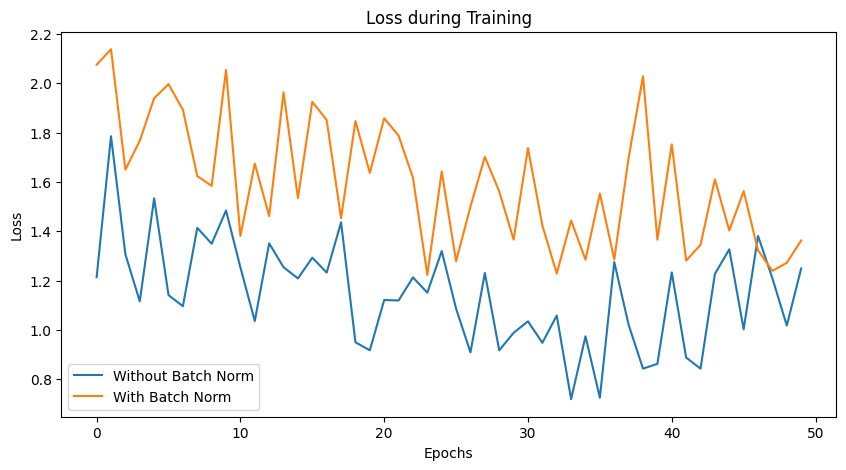

In [49]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 모델 정의 (배치 정규화 유무에 따라)
class ModelNoBN(nn.Module):
    def __init__(self):
        super(ModelNoBN, self).__init__()
        self.fc = nn.Linear(10, 10)
    def forward(self, x):
        return self.fc(x)

class ModelWithBN(nn.Module):
    def __init__(self):
        super(ModelWithBN, self).__init__()
        self.fc = nn.Linear(10, 10)
        self.bn = nn.BatchNorm1d(10)
    def forward(self, x):
        x = self.fc(x)
        return self.bn(x)

# 학습 과정 시뮬레이션
def simulate_training(model, epochs=50):
    losses = []
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    for _ in range(epochs):
        data = torch.randn(10, 10)
        target = torch.randn(10, 10)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

# 모델 학습 및 결과 저장
losses_no_bn = simulate_training(ModelNoBN())
losses_with_bn = simulate_training(ModelWithBN())

# 그래프 시각화
plt.figure(figsize=(10, 5))
plt.plot(losses_no_bn, label='Without Batch Norm')
plt.plot(losses_with_bn, label='With Batch Norm')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


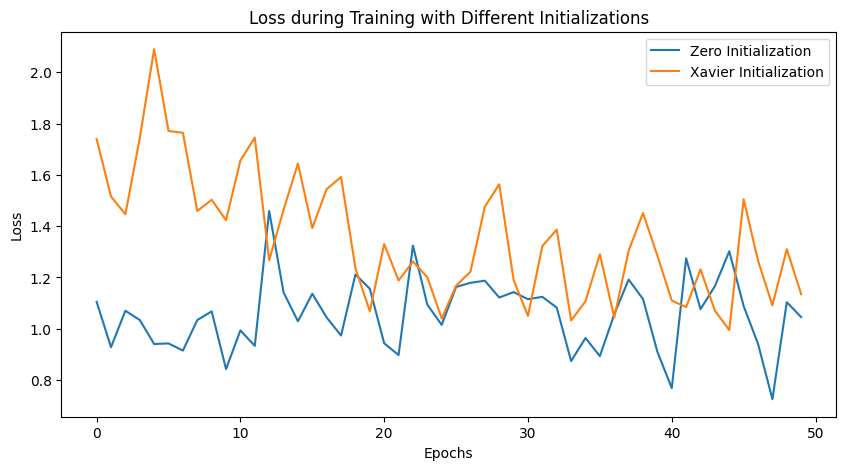

In [50]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 모델 정의 (가중치 초기화 방식에 따라)
class ModelZeroInit(nn.Module):
    def __init__(self):
        super(ModelZeroInit, self).__init__()
        self.fc = nn.Linear(10, 10)
        nn.init.constant_(self.fc.weight, 0)
    def forward(self, x):
        return self.fc(x)

class ModelXavierInit(nn.Module):
    def __init__(self):
        super(ModelXavierInit, self).__init__()
        self.fc = nn.Linear(10, 10)
        nn.init.xavier_uniform_(self.fc.weight)
    def forward(self, x):
        return self.fc(x)

# 학습 과정 시뮬레이션
def simulate_training_init(model, epochs=50):
    losses = []
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    for _ in range(epochs):
        data = torch.randn(10, 10)
        target = torch.randn(10, 10)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

# 모델 학습 및 결과 저장
losses_zero = simulate_training_init(ModelZeroInit())
losses_xavier = simulate_training_init(ModelXavierInit())

# 그래프 시각화
plt.figure(figsize=(10, 5))
plt.plot(losses_zero, label='Zero Initialization')
plt.plot(losses_xavier, label='Xavier Initialization')
plt.title('Loss during Training with Different Initializations')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


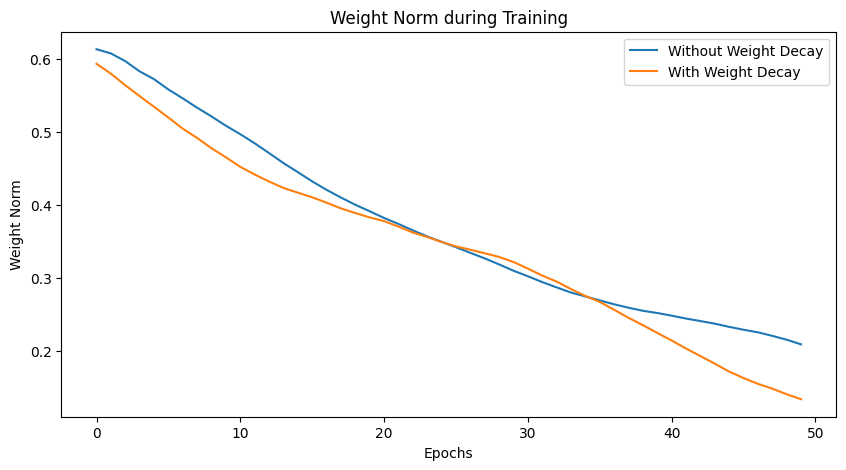

In [51]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 모델 정의
model = nn.Linear(10, 1)

# 학습 과정 시뮬레이션
def simulate_l2(model, weight_decay=0, epochs=50):
    weights_norm = []
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=weight_decay)
    for _ in range(epochs):
        data = torch.randn(10, 10)
        target = torch.randn(10, 1)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        weights_norm.append(model.weight.norm().item())
    return weights_norm

# 모델 학습 및 결과 저장
norm_no_decay = simulate_l2(nn.Linear(10, 1))
norm_with_decay = simulate_l2(nn.Linear(10, 1), weight_decay=0.01)

# 그래프 시각화
plt.figure(figsize=(10, 5))
plt.plot(norm_no_decay, label='Without Weight Decay')
plt.plot(norm_with_decay, label='With Weight Decay')
plt.title('Weight Norm during Training')
plt.xlabel('Epochs')
plt.ylabel('Weight Norm')
plt.legend()
plt.show()


100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 556kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.21MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.90MB/s]


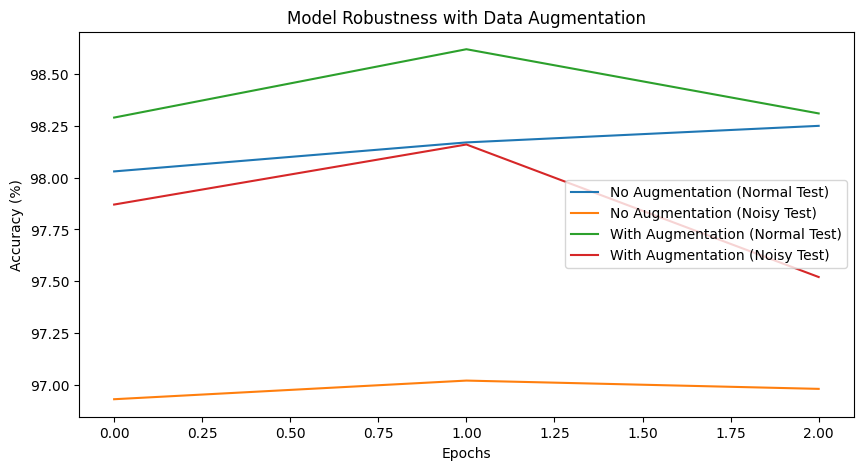

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc = nn.Linear(320, 10)

    def forward(self, x):
        x = torch.relu(nn.MaxPool2d(2)(self.conv1(x)))
        x = torch.relu(nn.MaxPool2d(2)(self.conv2(x)))
        x = x.view(-1, 320)
        x = self.fc(x)
        return x

# 데이터 증강 및 변환 정의
transform_no_aug = transforms.ToTensor()
transform_with_aug = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

# 데이터셋 로드
train_dataset_no_aug = datasets.MNIST(root='./data', train=True, download=True, transform=transform_no_aug)
train_dataset_with_aug = datasets.MNIST(root='./data', train=True, download=True, transform=transform_with_aug)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# 노이즈가 포함된 테스트셋 생성 (견고성 평가용)
test_dataset_noisy = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.Compose([
    transforms.RandomRotation(15),
    transforms.ToTensor()
]))

# 데이터 로더
train_loader_no_aug = DataLoader(train_dataset_no_aug, batch_size=64, shuffle=True)
train_loader_with_aug = DataLoader(train_dataset_with_aug, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000)
test_loader_noisy = DataLoader(test_dataset_noisy, batch_size=1000)

# 학습 함수
def train_and_eval(model, train_loader, test_loader_normal, test_loader_noisy, epochs=3):
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    acc_normal = []
    acc_noisy = []

    for epoch in range(epochs):
        model.train()
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

        # 평가
        model.eval()
        with torch.no_grad():
            correct_normal = 0
            total_normal = 0
            for data, target in test_loader_normal:
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)
                correct_normal += pred.eq(target.view_as(pred)).sum().item()
                total_normal += target.size(0)
            acc_normal.append(100. * correct_normal / total_normal)

            correct_noisy = 0
            total_noisy = 0
            for data, target in test_loader_noisy:
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)
                correct_noisy += pred.eq(target.view_as(pred)).sum().item()
                total_noisy += target.size(0)
            acc_noisy.append(100. * correct_noisy / total_noisy)
    return acc_normal, acc_noisy

# 모델 학습 및 평가
model_no_aug = SimpleCNN()
acc_no_aug_normal, acc_no_aug_noisy = train_and_eval(model_no_aug, train_loader_no_aug, test_loader, test_loader_noisy)

model_with_aug = SimpleCNN()
acc_with_aug_normal, acc_with_aug_noisy = train_and_eval(model_with_aug, train_loader_with_aug, test_loader, test_loader_noisy)

# 그래프 시각화
plt.figure(figsize=(10, 5))
plt.plot(acc_no_aug_normal, label='No Augmentation (Normal Test)')
plt.plot(acc_no_aug_noisy, label='No Augmentation (Noisy Test)')
plt.plot(acc_with_aug_normal, label='With Augmentation (Normal Test)')
plt.plot(acc_with_aug_noisy, label='With Augmentation (Noisy Test)')
plt.title('Model Robustness with Data Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()


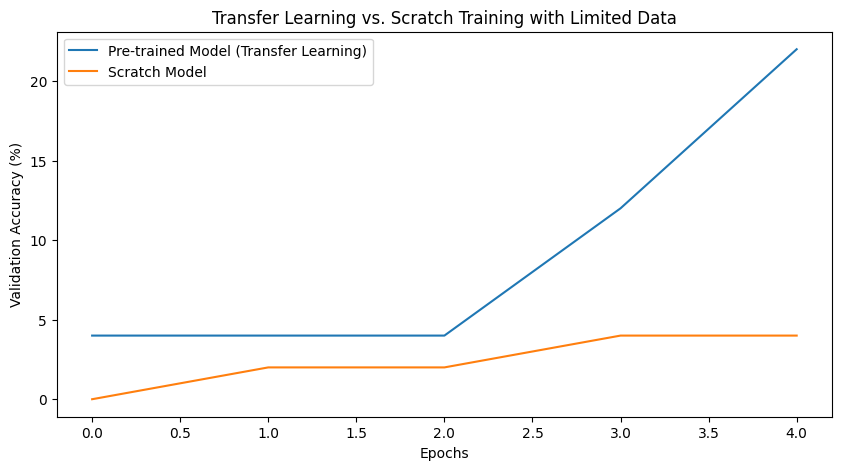

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 데이터셋 정의 (CIFAR-100의 작은 부분집합)
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor()
])

# 더미 데이터셋 생성 (데이터 부족 상황 시뮬레이션)
dummy_train_dataset = datasets.FakeData(size=100, image_size=(3, 32, 32), num_classes=100, transform=transform)
dummy_train_loader = DataLoader(dummy_train_dataset, batch_size=10)
dummy_val_dataset = datasets.FakeData(size=50, image_size=(3, 32, 32), num_classes=100, transform=transform)
dummy_val_loader = DataLoader(dummy_val_dataset, batch_size=10)

# 모델 정의 (스크래치 vs 사전 학습)
def get_model(pretrained=True):
    if pretrained:
        model = models.resnet18(weights='IMAGENET1K_V1')
        for param in model.parameters():
            param.requires_grad = False
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, 100) # 클래스 수 변경
    else:
        model = models.resnet18(weights=None)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, 100)
    return model

# 학습 함수
def train_and_validate(model, train_loader, val_loader, epochs=5):
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()
    accuracies = []

    for epoch in range(epochs):
        model.train()
        for data, target in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for data, target in val_loader:
                output = model(data)
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()
                total += target.size(0)
            accuracies.append(100. * correct / total)
    return accuracies

# 모델 학습 및 평가
acc_pretrained = train_and_validate(get_model(pretrained=True), dummy_train_loader, dummy_val_loader)
acc_scratch = train_and_validate(get_model(pretrained=False), dummy_train_loader, dummy_val_loader)

# 그래프 시각화
plt.figure(figsize=(10, 5))
plt.plot(acc_pretrained, label='Pre-trained Model (Transfer Learning)')
plt.plot(acc_scratch, label='Scratch Model')
plt.title('Transfer Learning vs. Scratch Training with Limited Data')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy (%)')
plt.legend()
plt.show()
